In [40]:
import requests
import time
import collections
import matplotlib
import pandas as pd
from pprint import pprint

In [2]:
url = 'https://api.vk.com/method/users.get?'
params = {
   # 'user_ids': id_,
    'v': 5.73,
    #'lang': 'ru',
    #'fields': 'sex, bdate, city',
    'access_token': '0bacdcbf0bacdcbf0bacdcbfca0bd98be200bac0bacdcbf54602e6c585bfb326e7d4966',
}

city_data = requests.get(url, params)

In [3]:
url = 'https://api.vk.com/method/groups.getMembers'

In [4]:
params = {
    'group_id': 'nplusone',
    'v': 5.73,
    'lang': 'ru',
    'fields': 'sex, bdate, city',
    'access_token': '0bacdcbf0bacdcbf0bacdcbfca0bd98be200bac0bacdcbf54602e6c585bfb326e7d4966',
}

In [5]:
req = requests.get(url, params)

In [6]:
data = req.json()

In [7]:
data

{'response': {'count': 211134,
  'items': [{'first_name': 'Николай',
    'id': 6,
    'last_name': 'Дуров',
    'sex': 2,
    'city': {'id': 2, 'title': 'Санкт-Петербург'}},
   {'first_name': 'Елисей',
    'id': 154,
    'last_name': 'Замахов',
    'sex': 2,
    'bdate': '10.8',
    'city': {'id': 6823, 'title': 'Łódź'}},
   {'first_name': 'Екатерина',
    'id': 243,
    'last_name': 'Скобейко',
    'sex': 1,
    'bdate': '26.3.1987',
    'city': {'id': 2, 'title': 'Санкт-Петербург'}},
   {'first_name': 'Мария',
    'id': 274,
    'last_name': 'Тюрина',
    'sex': 1,
    'bdate': '16.11.1985',
    'city': {'id': 2202278, 'title': 'Kraków'}},
   {'first_name': 'Галина',
    'id': 348,
    'last_name': 'Румянцева',
    'deactivated': 'banned',
    'sex': 1},
   {'first_name': 'Алексей',
    'id': 407,
    'last_name': 'Железнов',
    'sex': 2,
    'bdate': '3.8'},
   {'first_name': 'Павел',
    'id': 516,
    'last_name': 'Ковалёв',
    'sex': 2,
    'bdate': '10.1.1986',
    'city': {'i

In [15]:
ids = []
city = set()
for record in data['response']['items']:
    ids.append(record['id'])
    id_ = record['id']
    try:
#         if record['city']['title'] != '':
        city.add(record['city']['title'])
    except KeyError as ke:
#         print(f'Город у пользователя {record["id"]} не указан', ke)
        continue
# print(ids)
print(city)

{'', 'Helsinki', 'Дружковка', 'Дубна', 'Гатчина', 'Нижний Новгород', 'Железнодорожный (Балашиха)', 'Basel', 'Pattaya', 'Омск', 'Красноярск', 'Выборг', 'London', 'Марковская', 'Кишинев', 'Copenhagen', 'Минск', 'Phuket', 'Baden', 'Казань', 'Череповец', 'Орск', 'Альметьевск', 'Бугуртак', 'Новочеркасск', 'Димитровград', 'Veldhoven', 'Las Palmas de Gran Canaria', 'Wrocław', 'Gilching', 'Vilnius', 'Madrid', 'Умань', 'Луга', 'Saarbrücken', 'Łódź', 'Mindelo', 'Жуковский', 'Aizuwakamatsu', 'Москва', 'Новосибирск', 'Уфа', 'Bratislava', 'Lappeenranta', 'Озерск', 'Борок', 'Шаталово', 'Amstelveen', 'Limassol', 'Белоярский', 'Архангельск', 'Белгород', 'Toulouse', 'Kraków', 'Друг Крестьянина', 'Краснодар', 'Ростов-на-Дону', 'Санкт-Петербург', 'Иркутск', 'Петропавловск', 'Ставрополь', 'Лидино', 'Сочи', 'Самара', 'Uppsala', 'Киев', 'Челмужи', 'Тбилиси', 'Наро-Фоминск', 'Зеленоград', 'Стерлитамак', 'Islamabad', 'Amsterdam', 'Seattle', 'Королёв', 'Великий Новгород', 'München', 'Троицк', 'Таганрог', 'Пушк

In [26]:
cities_dict = {
    '': 0,
    'München': 0, 
    'Белгород': 0, 
    'Сочи': 0, 
    'Наро-Фоминск': 0, 
    'Кишинев': 0, 
    'Самара': 0, 
    'Жуковский': 0, 
    'Vilnius': 0, 
    'Железнодорожный (Балашиха)': 0, 
    'Ставрополь': 0, 'Казань': 0, 
    'Madrid': 0, 'Mindelo': 0, 
    'Друг Крестьянина': 0, 
    'Wrocław': 0, 
    'Łódź': 0, 
    'Pattaya': 0, 
    'Amstelveen': 0, 
    'Архангельск': 0, 
    'Gilching': 0, 
    'Уфа': 0, 
    'Пушкин': 0, 
    'Нижний Новгород': 0, 
    'Copenhagen': 0, 
    'Limassol': 0, 
    'Seattle': 0, 
    'Выборг': 0, 
    'Борок': 0, 
    'Великий Новгород': 0, 
    'Lappeenranta': 0, 
    'Bratislava': 0, 
    'Aizuwakamatsu': 0, 
    'Москва': 0, 
    'Тбилиси': 0, 
    'Челмужи': 0, 
    'Amsterdam': 0, 
    'Санкт-Петербург': 0, 
    'Baden': 0, 
    'Марковская': 0, 
    'Лидино': 0, 
    'Красноярск': 0, 
    'Луга': 0, 
    'Киев': 0, 
    'Дружковка': 0, 
    'Череповец': 0, 
    'Phuket': 0, 
    'Uppsala': 0, 
    'Краснодар': 0, 
    'Toulouse': 0, 
    'Гатчина': 0, 
    'Islamabad': 0, 
    'Шаталово': 0, 
    'Петропавловск': 0, 
    'Veldhoven': 0, 
    'Дубна': 0, 
    'Димитровград': 0, 
    'Новосибирск': 0, 
    'Омск': 0, 
    'Новочеркасск': 0, 
    'Зеленоград': 0, 
    'Минск': 0, 
    'Альметьевск': 0, 
    'Стерлитамак': 0, 
    'Озерск': 0, 
    'London': 0, 
    'Helsinki': 0, 
    'Иркутск': 0, 
    'Saarbrücken': 0, 
    'Las Palmas de Gran Canaria': 0, 
    'Орск': 0, 
    'Белоярский': 0, 
    'Ростов-на-Дону': 0, 
    'Королёв': 0, 
    'Умань': 0, 
    'Kraków': 0, 
    'Троицк': 0, 
    'Бугуртак': 0, 
    'Таганрог': 0, 
    'Basel': 0,
    'None': 0,
}

In [27]:
for record in data['response']['items']:
    id_ = record['id']
    try:
        town = record['city']['title']
#         if town != '':
        cities_dict[town] += 1 
    except KeyError as ke:
        cities_dict['None'] += 1
#         print(f'Город у пользователя {record["id"]} не указан', ke)
        continue

In [28]:
pprint(cities_dict)

{'': 2,
 'Aizuwakamatsu': 1,
 'Amstelveen': 1,
 'Amsterdam': 1,
 'Baden': 1,
 'Basel': 1,
 'Bratislava': 1,
 'Copenhagen': 1,
 'Gilching': 1,
 'Helsinki': 2,
 'Islamabad': 1,
 'Kraków': 1,
 'Lappeenranta': 1,
 'Las Palmas de Gran Canaria': 1,
 'Limassol': 1,
 'London': 2,
 'Madrid': 1,
 'Mindelo': 1,
 'München': 2,
 'None': 215,
 'Pattaya': 1,
 'Phuket': 1,
 'Saarbrücken': 1,
 'Seattle': 1,
 'Toulouse': 1,
 'Uppsala': 1,
 'Veldhoven': 1,
 'Vilnius': 1,
 'Wrocław': 1,
 'Łódź': 1,
 'Альметьевск': 1,
 'Архангельск': 1,
 'Белгород': 1,
 'Белоярский': 1,
 'Борок': 1,
 'Бугуртак': 1,
 'Великий Новгород': 2,
 'Выборг': 1,
 'Гатчина': 2,
 'Димитровград': 1,
 'Друг Крестьянина': 1,
 'Дружковка': 1,
 'Дубна': 2,
 'Железнодорожный (Балашиха)': 1,
 'Жуковский': 1,
 'Зеленоград': 1,
 'Иркутск': 1,
 'Казань': 1,
 'Киев': 1,
 'Кишинев': 1,
 'Королёв': 1,
 'Краснодар': 1,
 'Красноярск': 1,
 'Лидино': 1,
 'Луга': 1,
 'Марковская': 1,
 'Минск': 1,
 'Москва': 194,
 'Наро-Фоминск': 1,
 'Нижний Новгород': 

## Визуализация отчета по городам с помощью Pandas

In [29]:
df = pd.DataFrame.from_dict(cities_dict, orient = 'index').reset_index()

In [30]:
df

,index,0
0,,2
1,München,2
2,Белгород,1
3,Сочи,2
4,Наро-Фоминск,1
...,...,...
76,Троицк,1
77,Бугуртак,1
78,Таганрог,1
79,Basel,1


In [31]:
df.rename(columns={'index': 'Город', 0: 'Пользователей'}, inplace=True)
df = df.sort_values('Пользователей', ascending=False)

In [32]:
df

,Город,Пользователей
37,Санкт-Петербург,487
80,None,215
33,Москва,194
57,Новосибирск,11
23,Нижний Новгород,5
...,...,...
42,Луга,1
43,Киев,1
44,Дружковка,1
45,Череповец,1


In [35]:
df['category'] = df.apply(lambda x: x['Город'] if x['Пользователей'] > 100 else 'Другие', axis=1)

In [36]:
df

,Город,Пользователей,category
37,Санкт-Петербург,487,Санкт-Петербург
80,None,215,None
33,Москва,194,Москва
57,Новосибирск,11,Другие
23,Нижний Новгород,5,Другие
...,...,...,...
42,Луга,1,Другие
43,Киев,1,Другие
44,Дружковка,1,Другие
45,Череповец,1,Другие


In [37]:
df = df.groupby('category').sum().head()

In [38]:
df 

,Пользователей
category,
None,215
Другие,104
Москва,194
Санкт-Петербург,487


<AxesSubplot:ylabel='Пользователей'>

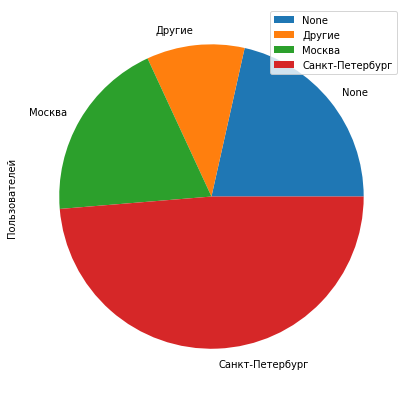

In [41]:
%matplotlib inline
df.head().plot(kind = 'pie', y = 'Пользователей', figsize= (7, 7))